# Description: 
- In this project we will build CNN model which will classify images from cifar10 datasets into 10 different categories. 
- `Overfitting` problem will be identified and will be resolved using `Image Augumentation` Technique

Reference: 
1. https://medium.com/@randerson112358/classify-images-using-convolutional-neural-networks-python-a89cecc8c679
2. CNN from Tensforflow

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# !pip install keras

In [3]:
# Load the data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [4]:
# Print the data types
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Get the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

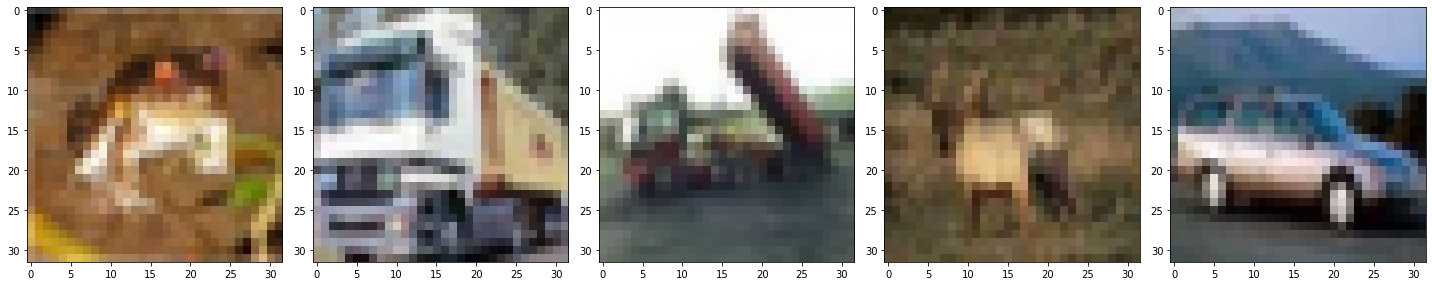

In [7]:
plotImages(X_train[:5])  # Plot images 0-4

In [8]:
# Print the label of the image
print('The label is:', y_train[0]) # 6 represent is frog

The label is: [6]


In [9]:
# One-Hot Encoding: Convert the labels into a set of 10 numbers to input into neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


# Print the new labels in the training data set
print(y_train_one_hot)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
# scale pixel in the the images to be values between 0 and 1
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
# Print an example of the new labels
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
# Build the CNN 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Create the architecture
model = Sequential([
    
    # Convolution Layer
    Conv2D(32, (5,5), activation='relu', kernel_initializer='glorot_uniform', padding='valid', input_shape=(32,32,3)),
    # MaxPooling Layer
    MaxPooling2D(pool_size=(2,2)),


    # Convolution Layer
    Conv2D(32, (5,5), activation='relu', kernel_initializer='glorot_uniform', padding='valid'),
    # MaxPooling Layer
    MaxPooling2D(pool_size=(2,2)),


    # Flatten Layer
    Flatten(),
    Dense(1000, activation='relu', kernel_initializer='glorot_uniform'),
    Dense(10, activation='softmax', kernel_initializer='glorot_uniform')
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              801000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
hist = model.fit(X_train, y_train_one_hot, batch_size=256, epochs=20, shuffle=True, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 3s 83us/step - loss: 1.6839 - accuracy: 0.3825 - val_loss: 1.4700 - val_accuracy: 0.4703
Epoch 2/20
35000/35000 [==============================] - 2s 44us/step - loss: 1.3383 - accuracy: 0.5156 - val_loss: 1.3409 - val_accuracy: 0.5195
Epoch 3/20
35000/35000 [==============================] - 2s 45us/step - loss: 1.2183 - accuracy: 0.5671 - val_loss: 1.2202 - val_accuracy: 0.5697
Epoch 4/20
35000/35000 [==============================] - 2s 44us/step - loss: 1.1146 - accuracy: 0.6067 - val_loss: 1.1871 - val_accuracy: 0.5847
Epoch 5/20
35000/35000 [==============================] - 2s 45us/step - loss: 1.0410 - accuracy: 0.6327 - val_loss: 1.0751 - val_accuracy: 0.6215
Epoch 6/20
35000/35000 [==============================] - 2s 44us/step - loss: 0.9658 - accuracy: 0.6597 - val_loss: 1.0988 - val_accuracy: 0.6143
Epoch 7/20
35000/35000 [==============================] - 2s 44us/st

In [15]:
# Get the models accuracy
model.evaluate(X_test, y_test_one_hot)

10000/10000 [==============================] - 1s 72us/step


[1.2134193983078003, 0.6830000281333923]

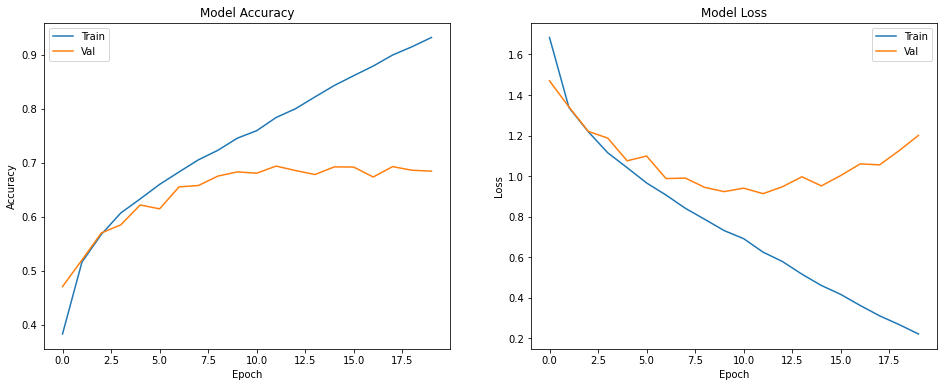

In [16]:
plt.figure(figsize=(16, 6))
# Visualize the models accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')

# Visualize the models loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()


        From 'Model Accuracy' and 'Model Loss' plots, it can be clearly seen that model is overfitting and hence it will give us poor performance for unseen data.

This problem can be resolved using "Image Augumentation" techniques

### Image Classification using Image Augumentation

Overfitting often occurs when we have a small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number and variety of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples through random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This exposes the model to more aspects of the data, allowing it to generalize better.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Image Augumentation
- Randomly applying horizontal flip augmentation -- passing `horizontal_flip=True` as an argument to the `ImageDataGenerator` class
- Randomly rotating image -- passing `rotation_range=45` as an argument to the `ImageDataGenerator` class
- Randomly zooming images up to 50% -- passing ` zoom_range=0.5` as an argument 
to the `ImageDataGenerator` class
- Applied rescale, width shift, height shift, shear shift to the training images.



In [0]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

image_gen_train.fit(X_train)

train_data_gen = image_gen_train.flow(X_train, y_train_one_hot, batch_size = 256)

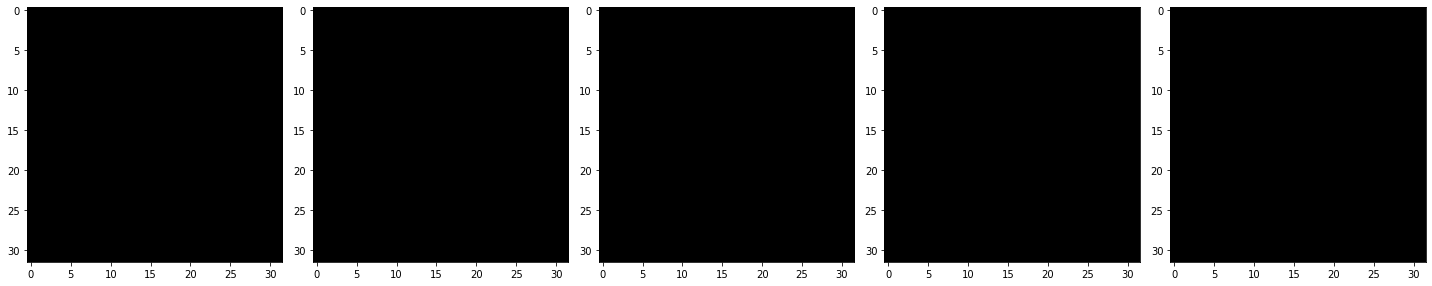

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
# Build the CNN 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


# Create the architecture
model = Sequential([
    
    # Convolution Layer
    Conv2D(32, (5,5), activation='relu', kernel_initializer='glorot_uniform', padding='valid', input_shape=(32,32,3)),
    # MaxPooling Layer
    MaxPooling2D(pool_size=(2,2)),


    # Convolution Layer
    Conv2D(32, (5,5), activation='relu', kernel_initializer='glorot_uniform', padding='valid'),
    # MaxPooling Layer
    MaxPooling2D(pool_size=(2,2)),


    Dropout(0.5),
    # Flatten Layer
    Flatten(),
    Dense(1000, activation='relu', kernel_initializer='glorot_uniform'),
    Dense(10, activation='softmax', kernel_initializer='glorot_uniform')
])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Train the model
%%time 
hist = model.fit_generator(train_data_gen, epochs=100, shuffle=True, validation_data=(X_test, y_test_one_hot), verbose = 0)

CPU times: user 35min 22s, sys: 20.8 s, total: 35min 43s
Wall time: 33min 8s


In [24]:
# Get the models accuracy
model.evaluate(X_test, y_test_one_hot)

10000/10000 [==============================] - 1s 84us/step


[296.89494443359376, 0.18219999969005585]

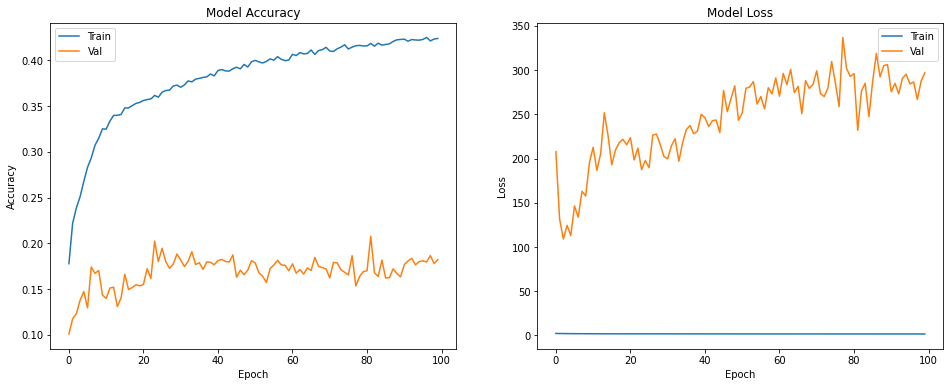

In [25]:
plt.figure(figsize=(16, 6))
# Visualize the models accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')

# Visualize the models loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

Interesting!! Accuracy is still increasing with the number of epoch.

### Prediction on unseen image

In [27]:
# Load the image data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('cat1010.jpg')

Saving cat1010.jpg to cat1010.jpg


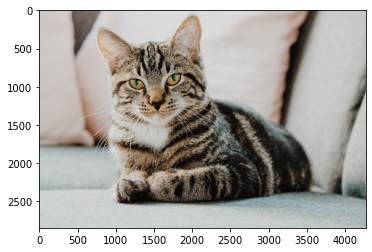

In [28]:
# Show the uploaded image
img = plt.imshow(my_image)

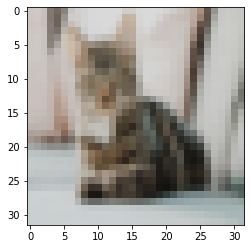

In [29]:
# Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32, 32, 3))

img = plt.imshow(my_image_resized)

In [30]:
# Get the probabilities for each class
import numpy as np
probabilities = model.predict( np.array([my_image_resized, ]))

# Print the Probabilities
probabilities

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0, :])
index

print(f'Most likely Class        : {number_to_class[index[9]] :{15}}', f'--probability: {probabilities[0, index[9]]}')
print(f'Second Most likely Class : {number_to_class[index[8]] :{15}}', f'--probability: {probabilities[0, index[8]]}')
print(f'Third Most likely Class  : {number_to_class[index[7]] :{15}}', f'--probability: {probabilities[0, index[7]]}')
print(f'Fourth Most likely Class : {number_to_class[index[6]] :{15}}', f'--probability: {probabilities[0, index[6]]}')
print(f'Fifth Most likely Class  : {number_to_class[index[5]] :{15}}', f'--probability: {probabilities[0, index[5]]}')

Most likely Class        : airplane        --probability: 1.0
Second Most likely Class : truck           --probability: 0.0
Third Most likely Class  : ship            --probability: 0.0
Fourth Most likely Class : horse           --probability: 0.0
Fifth Most likely Class  : frog            --probability: 0.0


In [0]:
# Save the model
model.save("my_model.h5")

In [0]:
# Load the model
from keras.models import load_model
model = load_model('my_model.h5')

The results are not good as expected. Hence, I need to work on Image Augmentation Section and tunning hyperparameters.